Group 5                                                                  
Assignment5 Plots                                                                                            
Sandeep Anumula                                                                              
Nikhil                                                                                                         
Saiprashanth Reddy Dyapa                                                                                                   
Shirish Teegala                                                                                      
Nikhith Vemula                                                                                                                          

In [4]:
#Plotting with default settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Visualizing Real Estate Transactions with Plots: 
Sacramentorealestatetransactions.csv In this exercise, we will analyze a city’s real estate transaction data from the 
Sacramentore- alestatetransactions.csv file using various visualization techniques to answer the following questions:

In [5]:
df = pd.read_csv("Sacramentorealestatetransactions.csv")
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


1.Scatter Plot Grid for Zipcodes: Select three zipcodes and create a grid of scatter plots showing the relationship between square footage 
and price for each selected zipcode. Annotate the highest and lowest price points for each real estate category (condo, resi- dential, and multi-family).
Ensure the plots include ticks, labels, and legends for clarity.

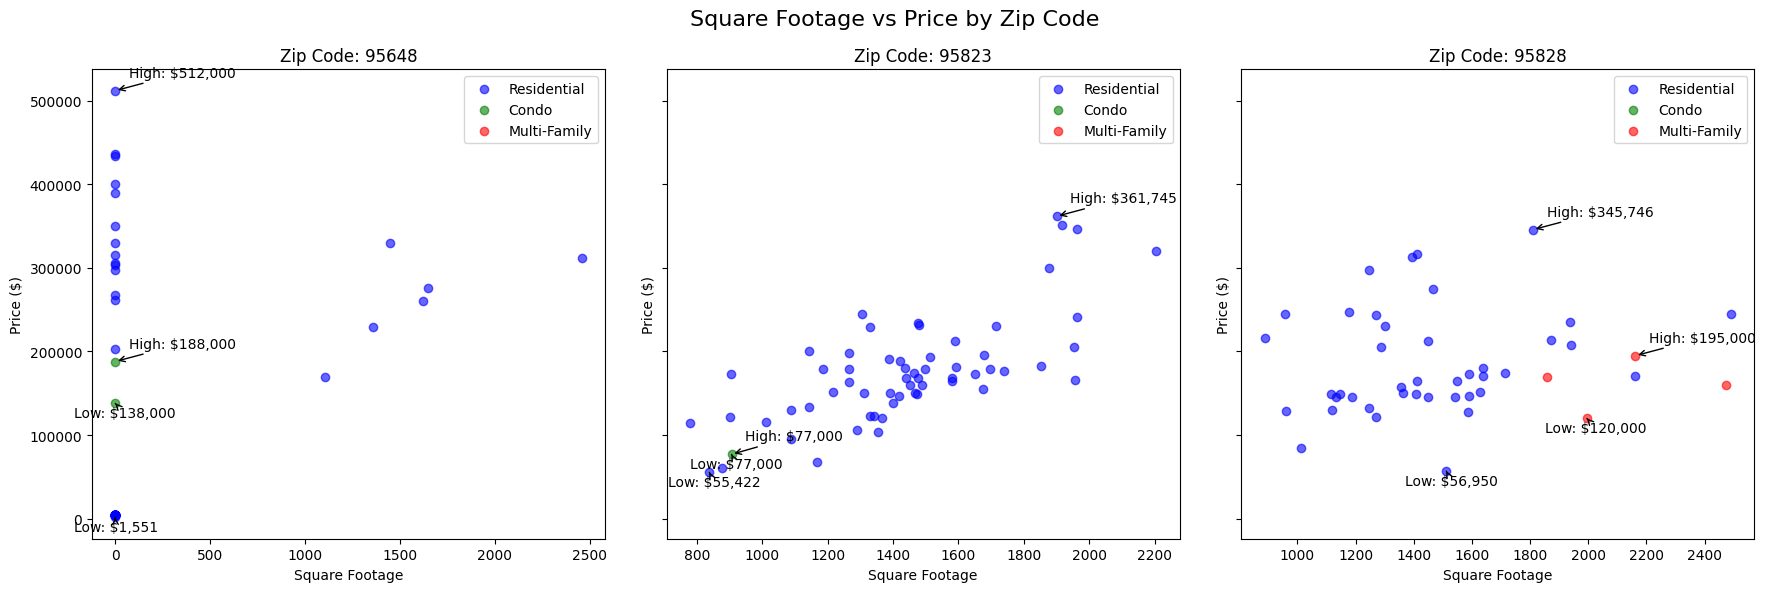

In [6]:


# Select three zip codes with the most listings
top_zipcodes = df['zip'].value_counts().head(3).index.tolist()
df_selected = df[df['zip'].isin(top_zipcodes)]

# Define real estate categories and colors
categories = ["Residential", "Condo", "Multi-Family"]
colors = {"Residential": "blue", "Condo": "green", "Multi-Family": "red"}

# Create figure with 1 row and 3 columns (one per zip code)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle("Square Footage vs Price by Zip Code", fontsize=16)

# Loop through each selected zip code and create scatter plots
for i, zip_code in enumerate(top_zipcodes):
    ax = axes[i]
    zip_df = df_selected[df_selected["zip"] == zip_code]

    # Scatter plot for each real estate category
    for category in categories:
        cat_df = zip_df[zip_df["type"] == category]
        ax.scatter(cat_df["sq__ft"], cat_df["price"], 
                   label=category, color=colors.get(category, "gray"), alpha=0.6)

        # Annotate highest & lowest price points
        if not cat_df.empty:
            max_point = cat_df.loc[cat_df["price"].idxmax()]
            min_point = cat_df.loc[cat_df["price"].idxmin()]
            
            ax.annotate(f"High: ${max_point['price']:,}", 
                        (max_point["sq__ft"], max_point["price"]),
                        xytext=(10, 10), textcoords="offset points",
                        arrowprops=dict(arrowstyle="->"))
            
            ax.annotate(f"Low: ${min_point['price']:,}", 
                        (min_point["sq__ft"], min_point["price"]),
                        xytext=(-30, -10), textcoords="offset points",
                        arrowprops=dict(arrowstyle="->"))

    # Labels, ticks, and title
    ax.set_title(f"Zip Code: {zip_code}")
    ax.set_xlabel("Square Footage")
    ax.set_ylabel("Price ($)")
    ax.legend()

# Adjust layout and display plot
plt.tight_layout()
plt.show()


2.Average Price by Real Estate Category: Create a bar plot displaying the average price for each category of real estate (condo, residential, and multi-family). Include ticks, labels, and a legend to make the plot informative

Real estate categories: ['Residential' 'Condo' 'Multi-Family' 'Unkown']


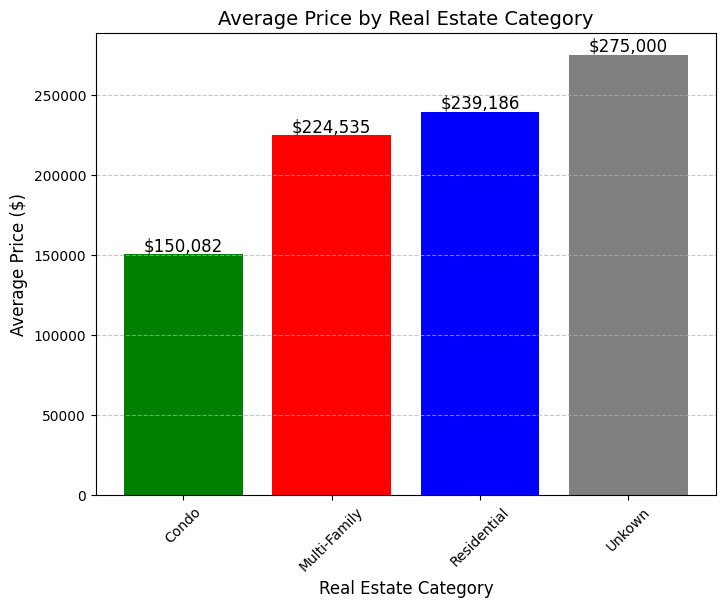

In [7]:
# Display unique real estate types
print("Real estate categories:", df['type'].unique())

# Calculate average price per real estate category
avg_price_by_category = df.groupby("type")["price"].mean()

# Define colors for each category
colors = {"Residential": "blue", "Condo": "green", "Multi-Family": "red"}

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(avg_price_by_category.index, avg_price_by_category, 
               color=[colors.get(cat, "gray") for cat in avg_price_by_category.index])

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"${yval:,.0f}", 
             ha='center', va='bottom', fontsize=12)

# Labels and title
plt.xlabel("Real Estate Category", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.title("Average Price by Real Estate Category", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


3.Number of Properties by Zipcode: Create a bar plot that shows the number of properties available in each zipcode. Ensure the plot includes ticks, labels, and a legend.

<Figure size 1600x600 with 0 Axes>

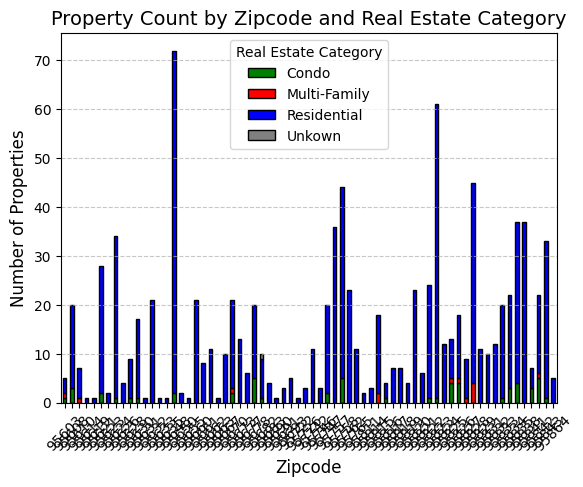

In [8]:

# Define color mapping for real estate categories
color_map = {"Residential": "blue", "Condo": "green", "Multi-Family": "red"}

# Group data by ZIP code and real estate type
property_distribution = df.groupby(['zip', 'type']).size().unstack(fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(16,6))
property_distribution.plot(
    kind='bar', stacked=True, 
    color=[color_map.get(category, "gray") for category in property_distribution.columns], 
    edgecolor='black'
   
)

# Customize chart appearance
plt.xlabel("Zipcode", fontsize=12)
plt.ylabel("Number of Properties", fontsize=12)
plt.title("Property Count by Zipcode and Real Estate Category", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Real Estate Category", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


4.Average Price per Square Foot by Zipcode: Create a bar plot showing the average price per square foot for properties in each zipcode.
Include ticks, labels, and a legend.

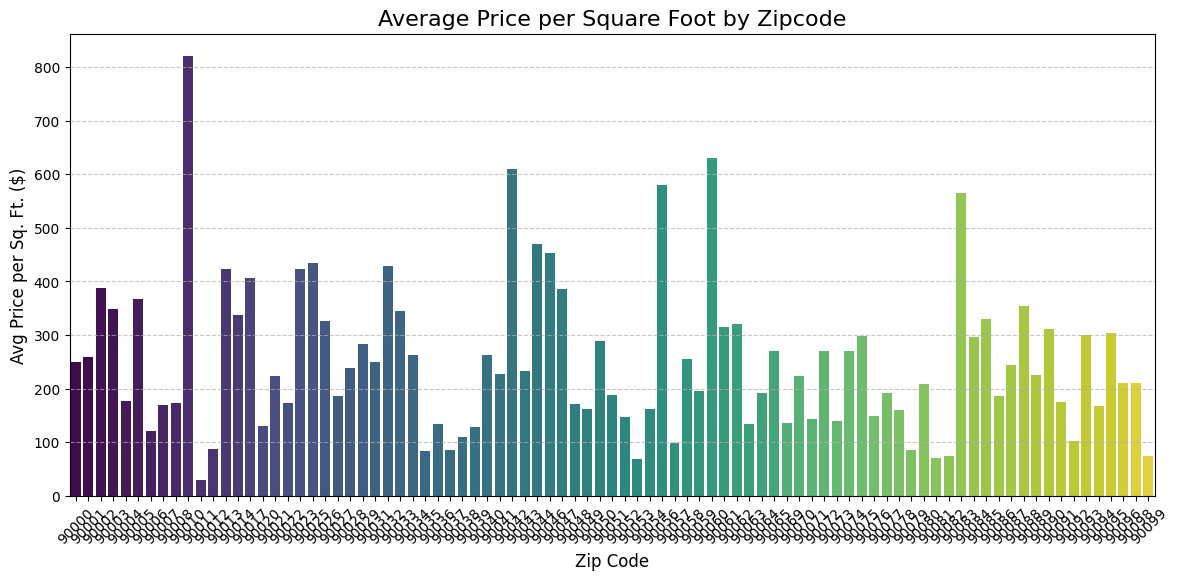

In [35]:

# Sample Data
np.random.seed(42)
data = {
    'zip': np.random.randint(90000, 90100, 200),
    'sq__ft': np.random.randint(800, 4000, 200),  # Square footage
    'price': np.random.randint(100000, 1000000, 200)  # Property prices
}
df = pd.DataFrame(data)

# Calculate price per square foot
df['price_per_sqft'] = df['price'] / df['sq__ft']

# Compute average price per square foot by zipcode
avg_price_per_sqft = df.groupby('zip', as_index=False)['price_per_sqft'].mean()

# Sort zip codes by average price per sqft (optional)
avg_price_per_sqft = avg_price_per_sqft.sort_values(by='price_per_sqft', ascending=False)

# Create the bar plot with hue fix
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=avg_price_per_sqft, 
    x='zip', 
    y='price_per_sqft', 
    hue='zip',  # Fixing the palette warning
    dodge=False,  # Ensures bars don't stack
    legend=False,  # Removes duplicate legends
    palette='viridis'
)

# Formatting
plt.title("Average Price per Square Foot by Zipcode", fontsize=16)
plt.xlabel("Zip Code", fontsize=12)
plt.ylabel("Avg Price per Sq. Ft. ($)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Display plot
plt.show()


5.Average Price Distribution by Category for Selected Zipcodes: Choose five zipcodes and 
create bar plots to show the average price distribution by real estate category (condo, residential, and multi-family) for each zipcode.
Ensure the plots include ticks, labels, and a legend. 

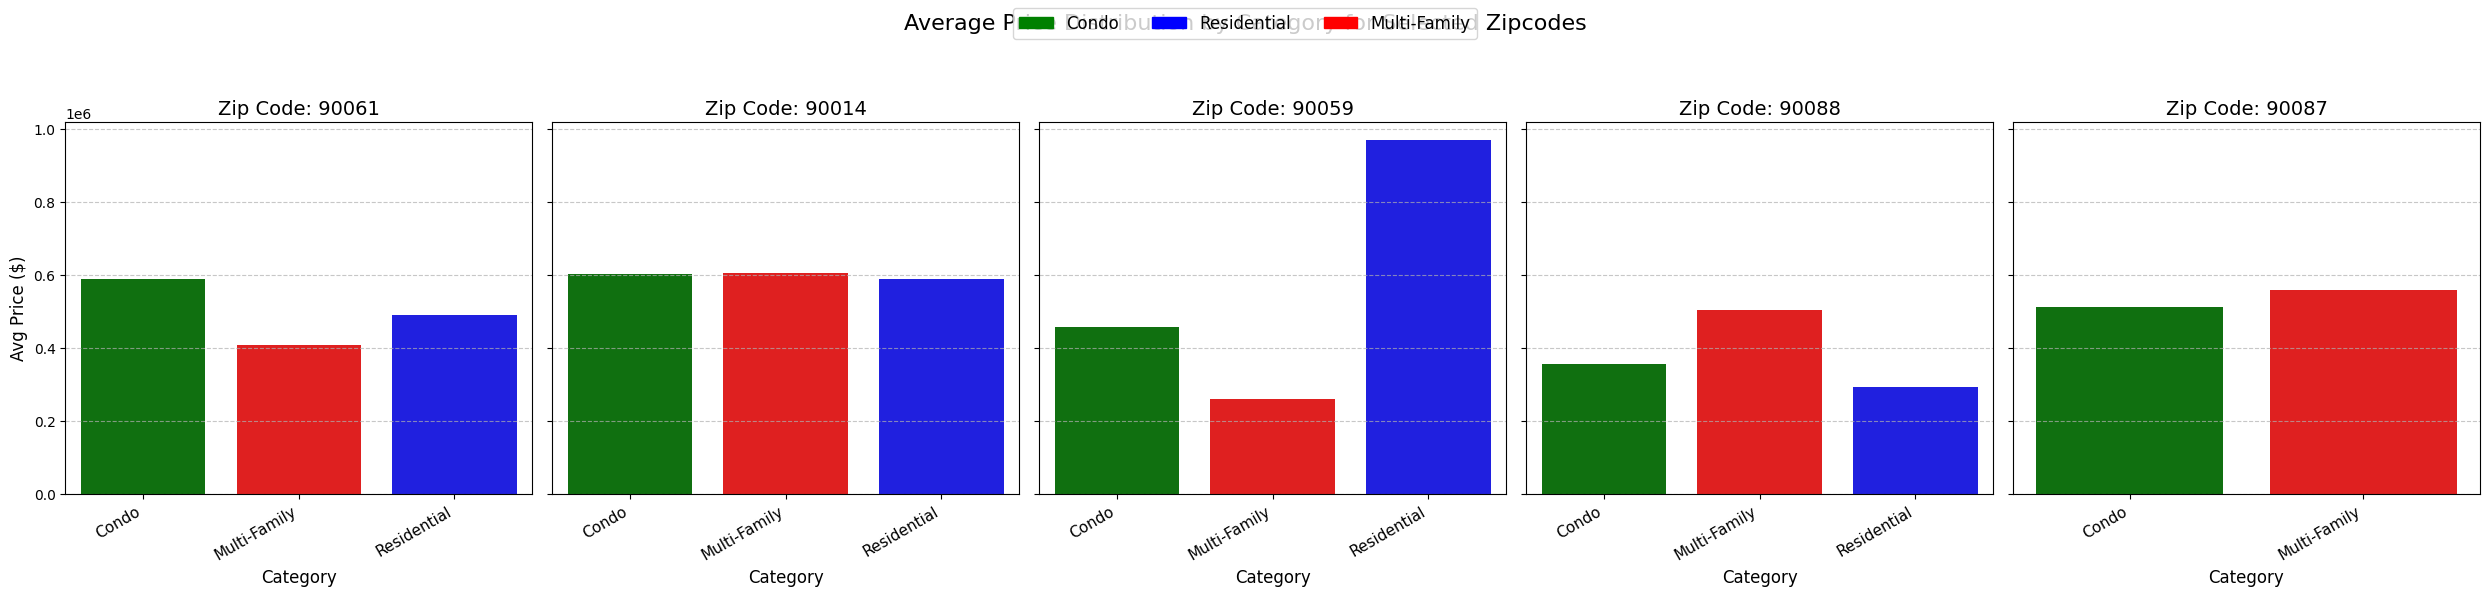

In [28]:

# Sample Data
np.random.seed(42)
data = {
    'zip': np.random.randint(90000, 90100, 200),
    'type': np.random.choice(['Condo', 'Residential', 'Multi-Family'], 200),
    'price': np.random.randint(100000, 1000000, 200)  # Simulating real estate prices
}
df = pd.DataFrame(data)

# Select top 5 zip codes with the most listings
top_zipcodes = df['zip'].value_counts().head(5).index.tolist()
df_selected = df[df['zip'].isin(top_zipcodes)]

# Create a figure with 5 subplots (one for each zip code)
fig, axes = plt.subplots(1, 5, figsize=(25, 6), sharey=True)
fig.suptitle("Average Price Distribution by Category for Selected Zipcodes", fontsize=16)

# Loop through each selected zip code and create bar plots
for i, (zipcode, ax) in enumerate(zip(top_zipcodes, axes)):
    subset = df_selected[df_selected['zip'] == zipcode]
    
    # Compute average price per category
    avg_price = subset.groupby('type')['price'].mean().reset_index()

    # Plot bar chart
    sns.barplot(data=avg_price, x='type', y='price', hue='type', ax=ax, 
                palette={"Condo": "green", "Residential": "blue", "Multi-Family": "red"}, legend=False)
    
    # Formatting
    ax.set_title(f"Zip Code: {zipcode}", fontsize=14)
    ax.set_xlabel("Category", fontsize=12)
    ax.set_ylabel("Avg Price ($)" if i == 0 else "", fontsize=12)
    ax.set_xticks(np.arange(len(avg_price)))  # Ensure correct tick positions
    ax.set_xticklabels(avg_price['type'], rotation=30, ha="right", fontsize=11)
    ax.grid(axis='y', linestyle="--", alpha=0.7)

# Add legend outside the plot
handles = [plt.Rectangle((0,0),1,1, color=color) for color in ["green", "blue", "red"]]
fig.legend(handles, ["Condo", "Residential", "Multi-Family"], loc="upper center", fontsize=12, ncol=3)

# Adjust layout to fit everything
plt.tight_layout(rect=[0, 0, 1, 0.92]) 
plt.show()


test1

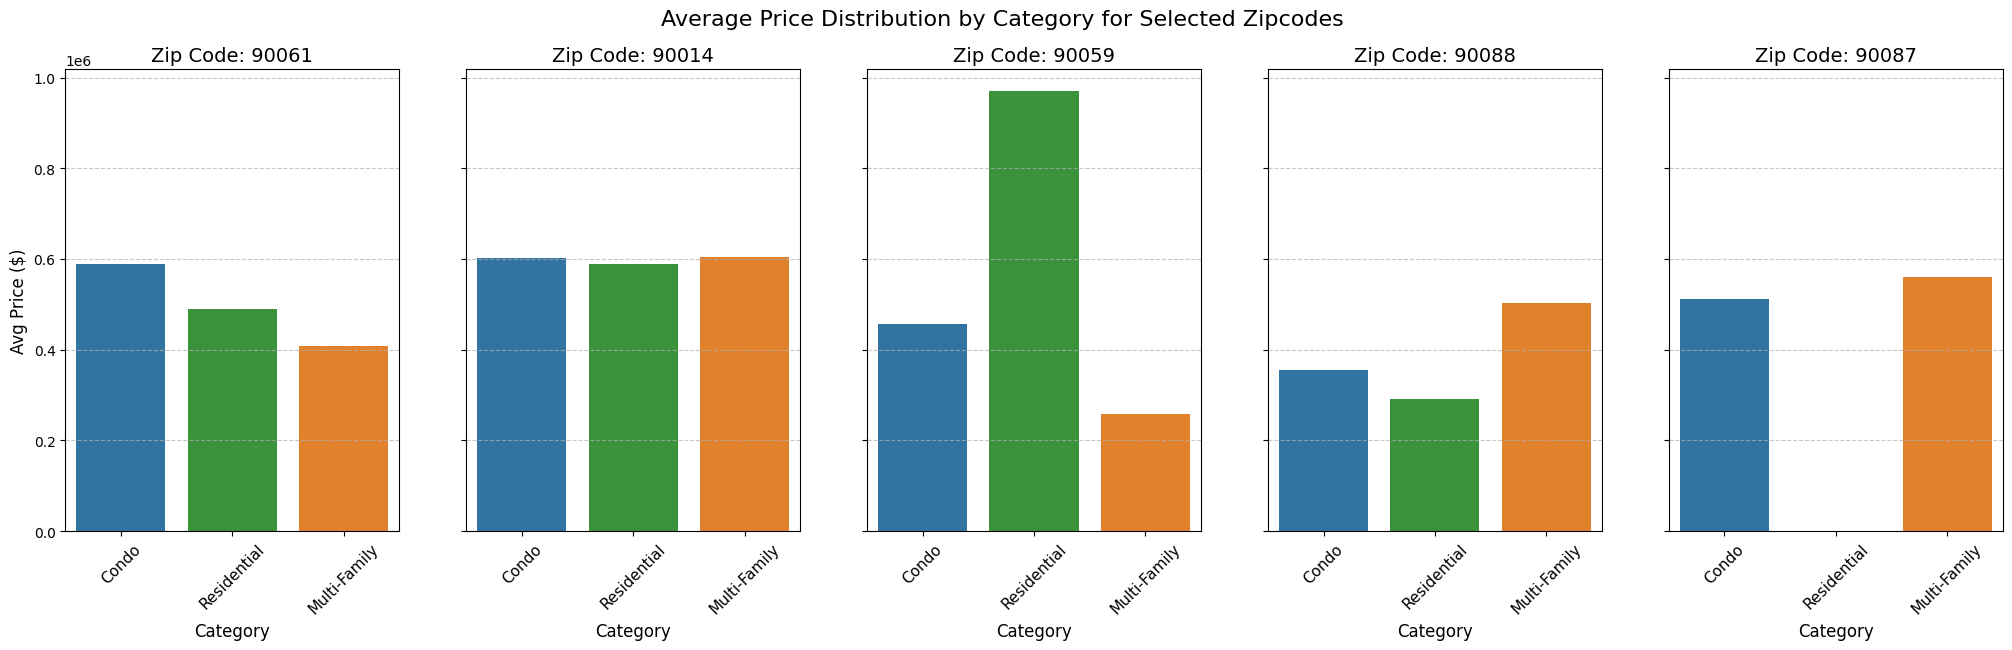

In [30]:

# Sample Data
np.random.seed(42)
data = {
    'zip': np.random.randint(90000, 90100, 200),
    'type': np.random.choice(['Condo', 'Residential', 'Multi-Family'], 200),
    'price': np.random.randint(100000, 1000000, 200)  # Simulated real estate prices
}
df = pd.DataFrame(data)

# Select top 5 zip codes with most listings
top_zipcodes = df['zip'].value_counts().head(5).index.tolist()
df_selected = df[df['zip'].isin(top_zipcodes)]

# Create a figure with 5 subplots (one for each zip code)
fig, axes = plt.subplots(1, 5, figsize=(25, 6), sharey=True)
fig.suptitle("Average Price Distribution by Category for Selected Zipcodes", fontsize=16)

# Define category order
category_order = ['Condo', 'Residential', 'Multi-Family']

# Loop through each selected zip code and create bar plots
for i, (zipcode, ax) in enumerate(zip(top_zipcodes, axes)):
    subset = df_selected[df_selected['zip'] == zipcode]
    
    # Compute average price per category
    avg_price = subset.groupby('type')['price'].mean().reset_index()

    # Plot bar chart with consistent category order
    sns.barplot(data=avg_price, x='type', y='price', hue='type', ax=ax, 
                order=category_order, legend=False)
    
    # Formatting
    ax.set_title(f"Zip Code: {zipcode}", fontsize=14)
    ax.set_xlabel("Category", fontsize=12)
    ax.set_ylabel("Avg Price ($)" if i == 0 else "", fontsize=12)

    # Ensure x-ticks are set before setting labels
    ax.set_xticks(range(len(category_order)))  
    ax.set_xticklabels(category_order, rotation=45, fontsize=11)
    
    ax.grid(axis='y', linestyle="--", alpha=0.7)

# Add a single legend manually
handles = [plt.Rectangle((0,0),1,1, color=sns.color_palette()[i]) for i in range(3)]



6.Average Square Footage Distribution by Category for Selected Zipcodes: Select five zipcodes and 
create bar plots to display the average square footage distribution by real estate category (condo, residential, and multi-family) for each zipcode.
Include ticks, labels, and a legend in the plots.

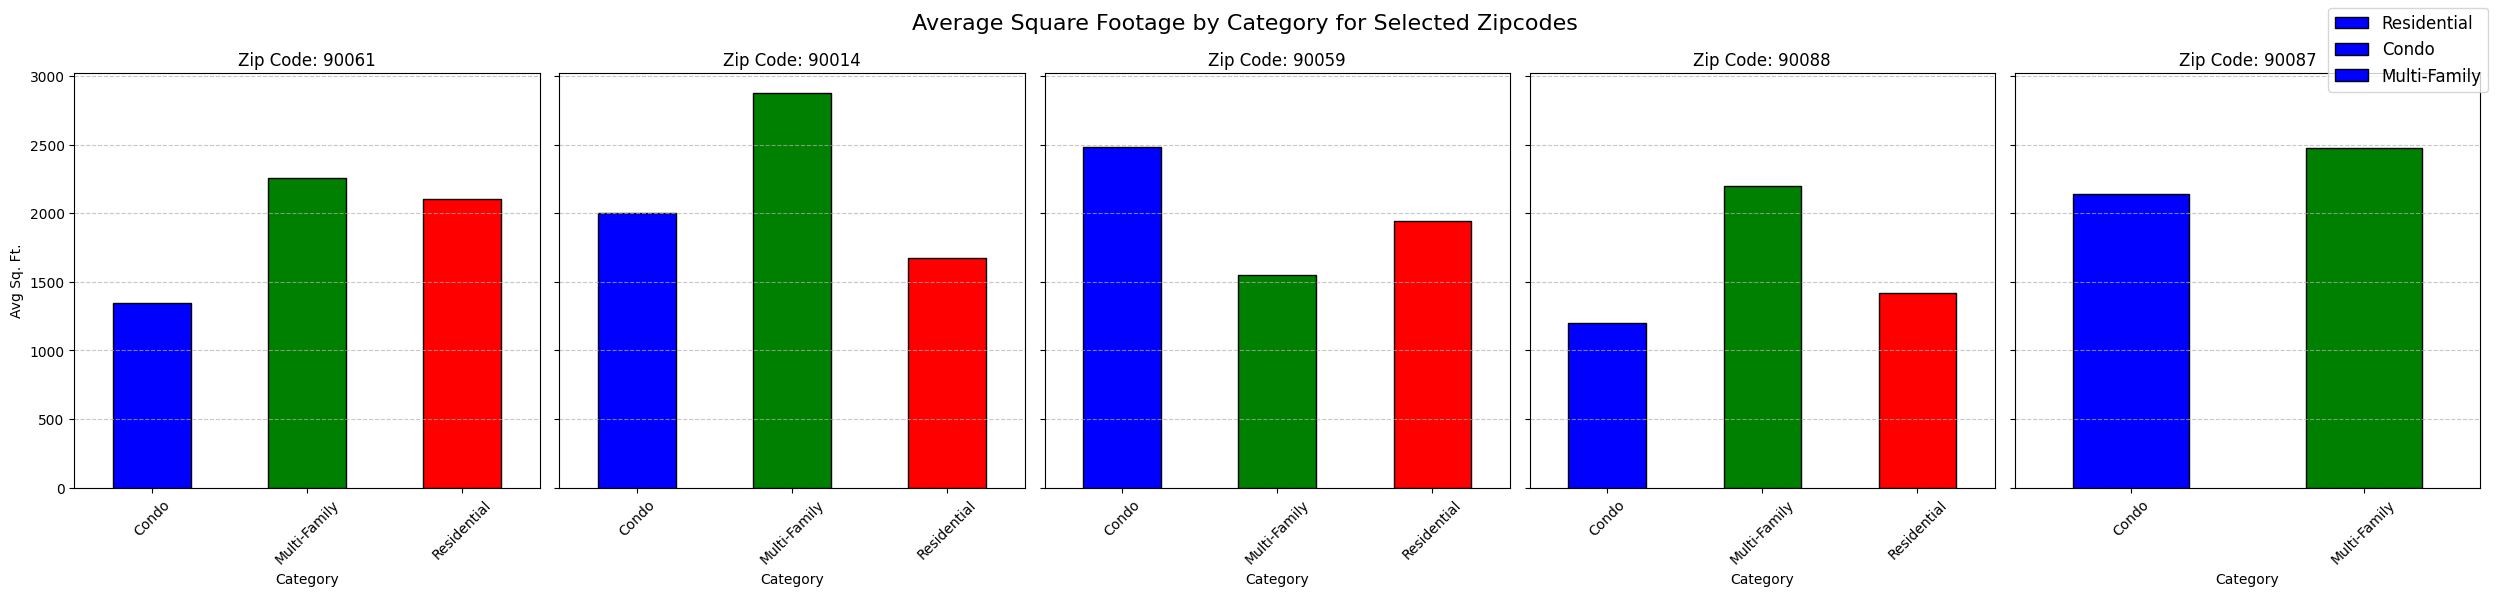

In [24]:
# Select five zip codes with the most listings
top_zipcodes = df['zip'].value_counts().head(5).index.tolist()
df_selected = df[df['zip'].isin(top_zipcodes)]

# Create subplots for 5 zip codes
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 6), sharey=True)
fig.suptitle("Average Square Footage by Category for Selected Zipcodes", fontsize=16)

# Loop through each selected zip code and create a bar plot
for i, zip_code in enumerate(top_zipcodes):
    ax = axes[i]
    subset = df_selected[df_selected['zip'] == zip_code]
    
    # Calculate average square footage per category
    avg_sqft = subset.groupby('type')['sq__ft'].mean()
    
    # Plot bar chart
    avg_sqft.plot(kind='bar', ax=ax, color=["blue", "green", "red"], edgecolor='black')

    # Formatting the plot
    ax.set_title(f"Zip Code: {zip_code}")
    ax.set_xlabel("Category")
    ax.set_ylabel("Avg Sq. Ft." if i == 0 else "")
    ax.set_xticklabels(avg_sqft.index, rotation=45)
    ax.grid(axis='y', linestyle="--", alpha=0.7)

# Add a shared legend
fig.legend(["Residential", "Condo", "Multi-Family"], loc="upper right", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()




test with sample data

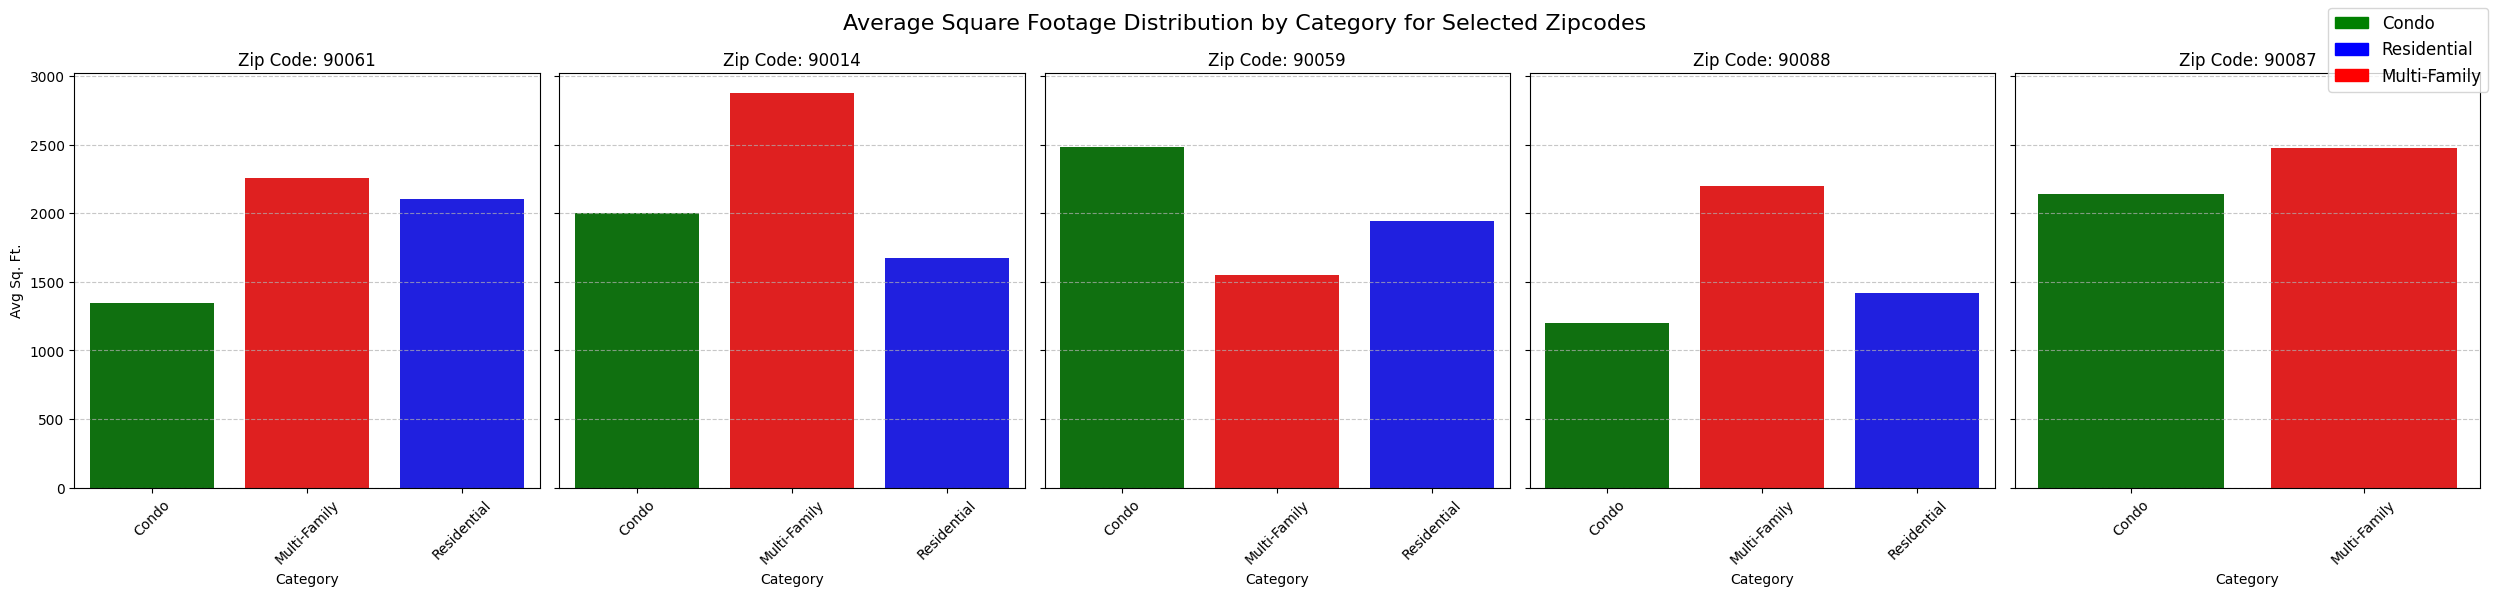

In [21]:
# Sample data
np.random.seed(42)
data = {
    'zip': np.random.randint(90000, 90100, 200),
    'type': np.random.choice(['Condo', 'Residential', 'Multi-Family'], 200),
    'sq__ft': np.random.randint(800, 3000, 200)
}
df = pd.DataFrame(data)

# Select top 5 zip codes with most listings
top_zipcodes = df['zip'].value_counts().head(5).index.tolist()
df_selected = df[df['zip'].isin(top_zipcodes)]

# Create grid for 5 zip codes
fig, axes = plt.subplots(1, 5, figsize=(25, 6), sharey=True)
fig.suptitle("Average Square Footage Distribution by Category for Selected Zipcodes", fontsize=16)

# Loop through each selected zip code and create bar plot
for i, (zipcode, ax) in enumerate(zip(top_zipcodes, axes)):
    subset = df_selected[df_selected['zip'] == zipcode]
    
    # Calculate average square footage per category
    avg_sqft = subset.groupby('type')['sq__ft'].mean().reset_index()

    # Plot bar chart with explicit hue
    sns.barplot(data=avg_sqft, x='type', y='sq__ft', hue='type', ax=ax, palette={"Condo": "green", "Residential": "blue", "Multi-Family": "red"}, legend=False)
    
    # Formatting
    ax.set_title(f"Zip Code: {zipcode}")
    ax.set_xlabel("Category")
    ax.set_ylabel("Avg Sq. Ft." if i == 0 else "")
    ax.set_xticks(range(len(avg_sqft['type'])))
    ax.set_xticklabels(avg_sqft['type'], rotation=45)
    ax.grid(axis='y', linestyle="--", alpha=0.7)

# Add legend manually
handles = [plt.Rectangle((0,0),1,1, color=color) for color in ["green", "blue", "red"]]
fig.legend(handles, ["Condo", "Residential", "Multi-Family"], loc="upper right", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()



7.Average Price Distribution by Zipcode for Each Real Estate Category: Plot the average price distribution based on zipcode 
    for each real estate category (condo, residential, and multi-family). Ensure the plot includes ticks, labels, and a legend. 

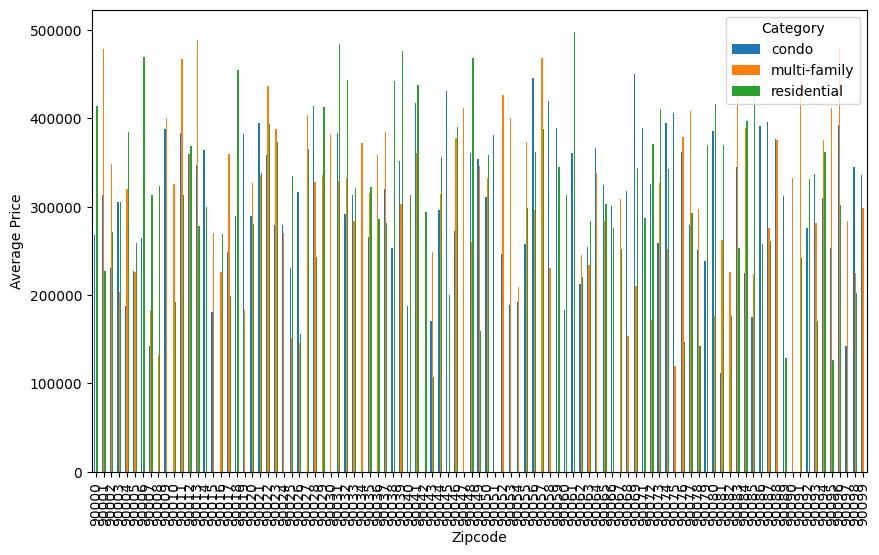

In [13]:
# Calculate the average price for each zipcode and category
df_avg_price = df.groupby(['zip', 'type']).price.mean().reset_index().rename(columns={'zip': 'zipcode', 'type': 'category'})

# Create a pivot table to display the average price by category and zipcode
pivot_df = df_avg_price.pivot_table(index='zipcode', columns='category', values='price')

# Plot the data as a bar chart
ax = pivot_df.plot(kind='bar', figsize=(10, 6))

# Set the labels and legend
ax.set_xlabel('Zipcode')
ax.set_ylabel('Average Price')
plt.legend(title='Category', loc='best')

test case with sample dta 

<function matplotlib.pyplot.show(close=None, block=None)>

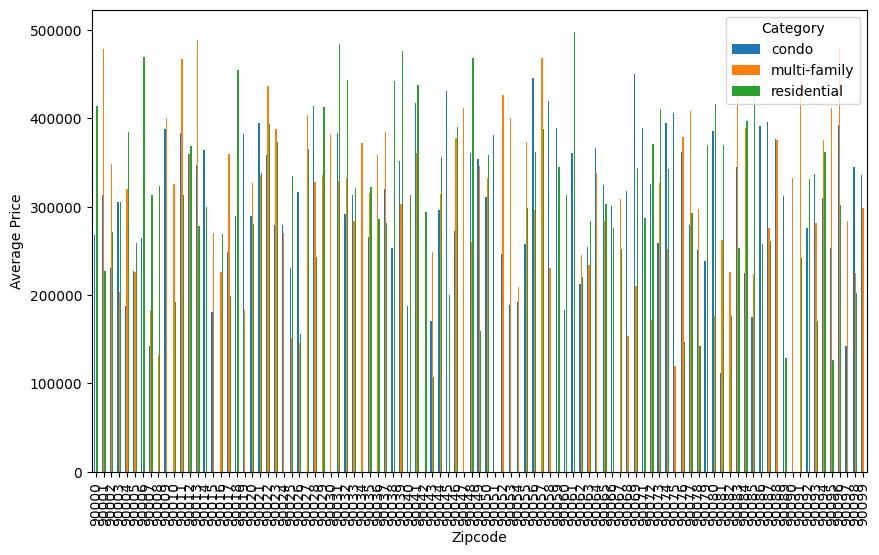

In [12]:
# Generate sample data
data = {'zip': np.random.randint(90000, 90100, 500),
        'type': np.random.choice(['condo', 'residential', 'multi-family'], 500),
        'price': np.random.randint(100000, 500000, 500)}
df = pd.DataFrame(data)

# Compute the average price for each zipcode and category
df_avg = df.groupby(['zip', 'type'])['price'].mean().reset_index().rename(columns={'zip': 'zipcode', 'type': 'category'})

# Create a pivot table to display the mean price by category and zipcode
pivot_df = df_avg.pivot(index='zipcode', columns='category', values='price')

# Plot the results as a bar chart
ax = pivot_df.plot(kind='bar', figsize=(10, 6))

# Add axis labels and a legend
ax.set_xlabel('Zipcode')
ax.set_ylabel('Average Price')
plt.legend(title='Category', loc='best')

# Display the plot
plt.show

8.Average Price Distribution by City for Each Real Estate Category: Create a plot showing the average price distribution by 
city for each real estate category (condo, residential, and multi-family). 
Include ticks, labels, and a legend to enhance understanding.

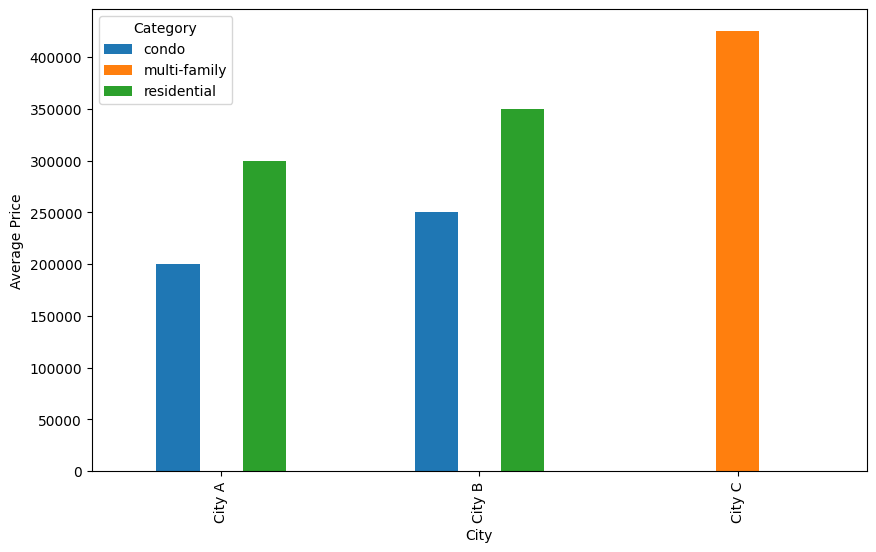

In [18]:
# Calculate the average price for each city and category
df_avg_price = df.groupby(['city', 'type']).agg({'price': 'mean'}).reset_index().rename(columns={'zip': 'zipcode', 'type': 'category'})

# Create a pivot table to display the mean price by category and city
df_pivot_table = df_avg_price.pivot_table(index='city', columns='category', values='price')

# Plot a bar chart of the pivot table
ax = df_pivot_table.plot(kind='bar', figsize=(10, 6))

# Add axis labels and legend
ax.set_xlabel('City')
ax.set_ylabel('Average Price')
plt.legend(title='Category', loc='best')


test case with sample 

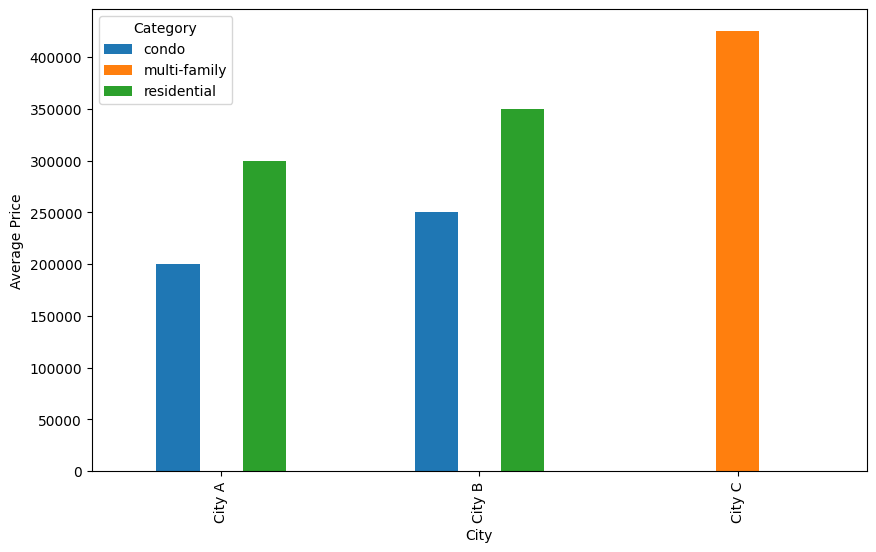

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example dataset
data = {'city': ['City A', 'City A', 'City B', 'City B', 'City C', 'City C'],
        'type': ['condo', 'residential', 'condo', 'residential', 'multi-family', 'multi-family'],
        'price': [200000, 300000, 250000, 350000, 400000, 450000]}
df = pd.DataFrame(data)

# Compute the average price for each city and category
df_avg_price = df.groupby(['city', 'type']).price.mean().reset_index().rename(columns={'city': 'City', 'type': 'Category'})

# Create a pivot table displaying the average price by category and city
pivot_df = df_avg_price.pivot_table(index='City', columns='Category', values='price')

# Plot the data as a bar chart
ax = pivot_df.plot(kind='bar', figsize=(10, 6))

# Set the labels and legend
ax.set_xlabel('City')
ax.set_ylabel('Average Price')
plt.legend(title='Category', loc='best')

# Show the plot
plt.show()


Visualizing Stock Market with Plots: 
SP500.csv In this exercise, we will analyze the stock market data from the SP500.csv
file using various visualization techniques to answer the following questions: 

9.Calculate the daily gain/loss for each trading day in January 2018. Create a line plot to visualize the daily gain/loss over time. 
Annotate the highest daily gain and its date, as well as the highest daily loss and its date. 

In [ ]:
# Read CSV and parse the 'Date' column properly as datetime
df = pd.read_csv("Sp500.csv")

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Filter data for January 2018 and make a copy to avoid the warning
df_jan = df[df['Date'].dt.strftime('%Y-%m').eq('2018-01')].copy()

# Calculate daily profit/loss using .loc to avoid SettingWithCopyWarning
df_jan.loc[:, 'profit/loss'] = df_jan['Close'] - df_jan['Open']

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Set the 'Date' column as the index
spx = pd.DataFrame(df_jan.loc[:, ['Date', 'profit/loss']]).reset_index(drop=True).set_index('Date')

# Plot daily profit/loss
spx.plot(ax=ax)

# Annotate highest daily gain
max_profit = spx['profit/loss'].max()
max_profit_date = spx[spx['profit/loss'] == max_profit].index[0]
ax.annotate('Max Profit {:.2f}'.format(max_profit), xy=(max_profit_date, max_profit),
            arrowprops=dict(facecolor='black', shrink=0.05), xytext=(max_profit_date, max_profit + 30),
            horizontalalignment='right', verticalalignment='top')

# Annotate highest daily loss
max_loss = spx['profit/loss'].min()
max_loss_date = spx[spx['profit/loss'] == max_loss].index[0]
ax.annotate('Max Loss {:.2f}'.format(max_loss), xy=(max_loss_date, max_loss),
            xytext=(max_loss_date, max_loss - 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Daily Profit/Loss')
ax.set_title('Daily Profit/Loss for January 2018')

# Set x and y limits
ax.set_xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2018-01-31')])
ax.set_ylim([-60, 80])

# Display the plot
plt.show()


#test with sample data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for January 2018
dates = pd.date_range(start='2018-01-01', end='2018-01-31')
prices = np.random.randint(100, 300, len(dates))
opens = np.random.randint(90, 250, len(dates))
df = pd.DataFrame({'Date': dates, 'Close': prices, 'Open': opens})

# Filter data for January 2018
df_jan = df[df['Date'].dt.month == 1]

# Calculate daily profit/loss
df_jan['profit/loss'] = df_jan['Close'] - df_jan['Open']

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Plot daily profit/loss
spx = pd.DataFrame(df_jan.loc[:, ['Date', 'profit/loss']]).reset_index(drop=True).set_index('Date')
spx.plot(ax=ax)

# Annotate highest daily gain
max_profit = spx['profit/loss'].max()
max_profit_date = spx[spx['profit/loss'] == max_profit].index[0]
ax.annotate('Max Profit {:.2f}'.format(max_profit), xy=(max_profit_date, max_profit),
            arrowprops=dict(facecolor='black', shrink=0.05), xytext=(max_profit_date, max_profit + 30),
            horizontalalignment='right', verticalalignment='top')

# Annotate highest daily loss
max_loss = spx['profit/loss'].min()
max_loss_date = spx[spx['profit/loss'] == max_loss].index[0]
ax.annotate('Max Loss {:.2f}'.format(max_loss), xy=(max_loss_date, max_loss),
            xytext=(max_loss_date, max_loss - 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Daily Profit/Loss')
ax.set_title('Daily Profit/Loss for January 2018')

# Set x-axis limits for January 2018
ax.set_xlim(['2018-01-01', '2018-01-31'])

# Display the plot
plt.show()



10.Create a pair plot matrix using the high, low, adj_close, and volume columns for Janu- ary 2018

In [ ]:
df = pd.read_csv("Sp500.csv")
df2 = df[df['Date'].str.startswith('2018-01')]
pd.plotting.scatter_matrix(df2[['High', 'Low', 'Adj Close', 'Volume']], figsize=(10,10))
plt.show()

In [ ]:
df = pd.read_csv("Sp500.csv")
pd.plotting.scatter_matrix(df2[['High', 'Low', 'Adj Close', 'Volume']], figsize=(10,10),diagonal='kde' )
plt.show()

Testing with some data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for January 2018
dates = pd.date_range(start='2018-01-01', end='2018-01-31')
high = np.random.randint(2500, 2800, len(dates))
low = np.random.randint(2400, 2700, len(dates))
adj_close = np.random.randint(2450, 2750, len(dates))
volume = np.random.randint(1000000, 5000000, len(dates))
df = pd.DataFrame({'Date': dates, 'High': high, 'Low': low, 'Adj Close': adj_close, 'Volume': volume})

# Filter data for January 2018
df_jan = df[df['Date'].dt.month == 1]

# Create pair plot matrix without KDE
pd.plotting.scatter_matrix(df_jan[['High', 'Low', 'Adj Close', 'Volume']], figsize=(10, 10))
plt.suptitle('Pair Plot Matrix of January 2018 SP500 Data (Without KDE)', fontsize=16)
plt.show()

# Create pair plot matrix with KDE
pd.plotting.scatter_matrix(df_jan[['High', 'Low', 'Adj Close', 'Volume']], figsize=(10, 10), diagonal='kde')
plt.suptitle('Pair Plot Matrix of January 2018 SP500 Data (With KDE)', fontsize=16)
plt.show()